# Feature engineering

In this notebook we cover examples of common feature engineering tasks on both numeric and categorical data. The goal isn't to be exhaustive, but provide you with enough examples that you get the picture. As we will see in future lectures, good feature engineering can significantly improve model performance, but feature engineering, just like machine learning in general, can be "part art, part science". So let's see what we mean by that.

We begin with numeric features. Let's begin by reading some data.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

auto = pd.read_csv('../data/auto-mpg.csv', sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])

auto['cylinders'] = auto['cylinders'].astype('category')
auto.describe()

,mpg,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,3.000000


We saw some examples of **feature transformation** functions in the previous lesson. **Feature engineering**, in fact, consists of running similar feature transformations on the data and gradually modifying existing columns and adding new features to the data, with the goal of ending up with features that are more useful to the model than the original features we started with. What makes feature engineering so special is that we apply these transformations with an eye towards making the machine learning easier or more doable. Having good features (what feature engineering is all about) can significantly impact how well we do when we move on to machine learning.

A common type of feature transformation for numeric features is **feature normalization**. Note that **normalization** is a word that means something very different in relational databases than in machine learning, so be careful not to confuse the two. The two most common ways to normalize features is **Z-normalization** and **min-max normalization**:

- **Z-normalization** consists of the following transformation, and results in most of the values for the transformed $x$ being between -2 and 2. 
$$x \rightarrow \dfrac{x - mean(x)}{std(x)}$$
- **min-max normalization** consists of the following transformation, and forces all the values of the transformed $x$ to be between 0 and 1: 
$$x \rightarrow \dfrac{x - min(x)}{max(x) - min(x)}$$

So what is the purpose of normalization? If we only have one feature, normalization doesn't really serve a purpose. Normalization makes sense when we have many features and we want to **put them on the same scale**, which is why normalization is also sometimes called **rescaling** or **standardization**. **Some (but not all) ML algorithms only work properly if the data is normalized, otherwise the features that are on a larger scale will exert undue influence on the model.** So normalization acts as a way of leveling the playing field.

### Exercise (15 minutes)

- Normalize `mpg`, `displacement`, `weight` and `acceleration`. Instead of overwriting the original columns, add the normalized features as new columns and name each column using the column name and a `_norm` suffix. You are free to choose between Z-normalization or min-max normalization.

In [16]:
auto['mpg_norm'] = (auto['mpg'] - auto['mpg'].mean()) / auto['mpg'].std()
auto['displacement_norm'] = (auto['displacement'] - auto['displacement'].mean()) / auto['displacement'].std()

In [17]:
auto['weight_norm'] = (auto['weight'] - auto['weight'].min()) / (auto['weight'].max() - auto['weight'].min())
auto['acceleration_norm'] = (auto['acceleration'] - auto['acceleration'].min()) / (auto['acceleration'].max() - auto['acceleration'].min())

In [18]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,-0.705551,1.089233,0.536150,0.238095
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,-1.089379,1.501624,0.589736,0.208333
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,-0.705551,1.194728,0.516870,0.178571
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,-0.961437,1.060461,0.516019,0.238095
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,-0.833494,1.041280,0.520556,0.148810


Unless your Python skills are improving by leaps and bounds, you probably normalized the features one at a time. What if we wanted to do it all at once? 

- Write a loop to iterate over the four columns and normalize each. To make it easier, we already put the column names in a list for you.

In [23]:
num_cols = ['mpg', 'displacement', 'weight', 'acceleration']
for col in num_cols:
    auto[col + '_norm_loop'] = (auto[col] - auto[col].mean()) / auto[col].std()

In [24]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg_norm,displacement_norm,weight_norm,acceleration_norm,mpg_norm_loop,displacement_norm_loop,weight_norm_loop,acceleration_norm_loop
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,-0.705551,1.089233,0.630077,-1.293870,-0.705551,1.089233,0.630077,-1.293870
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,-1.089379,1.501624,0.853259,-1.475181,-1.089379,1.501624,0.853259,-1.475181
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,-0.705551,1.194728,0.549778,-1.656492,-0.705551,1.194728,0.549778,-1.656492
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,-0.961437,1.060461,0.546236,-1.293870,-0.961437,1.060461,0.546236,-1.293870
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,-0.833494,1.041280,0.565130,-1.837804,-0.833494,1.041280,0.565130,-1.837804


There is an even better way to run our transformations all at once without writing a loop. First we have to write a function whose input is an array and whose output is an array of the same size with the values normalized. 

- Write such a function and use the below cell to test it and make sure it worked.

In [30]:
def normalize(x):
    x_norm = (x - x.mean())/x.std() # modify here to write your function
    return x_norm

x_test = np.array([3, 5, 9, 11, 2, 0])
normalize(x_test)

array([-0.51639778,  0.        ,  1.03279556,  1.54919334, -0.77459667,
       -1.29099445])

- Apply the function to the data. HINT: use the `apply` method.
  - note that we need to limit the data to only the four columns we wish to transform
  - we need to use the `axis = 0` argument to let `apply` know that the transformation applies to columns (`axis = 1` would apply it to rows, which is not what we want here)

In [38]:
auto[num_cols].apply(normalize, axis=0)

,mpg,displacement,weight,acceleration
0,-0.705551,1.089233,0.630077,-1.293870
1,-1.089379,1.501624,0.853259,-1.475181
2,-0.705551,1.194728,0.549778,-1.656492
3,-0.961437,1.060461,0.546236,-1.293870
4,-0.833494,1.041280,0.565130,-1.837804
...,...,...,...,...
393,0.445936,-0.512381,-0.213056,0.011571
394,2.620966,-0.924773,-0.992422,3.275173
395,1.085650,-0.560333,-0.797581,-1.438919
396,0.573879,-0.704191,-0.407897,1.099439


- Check the results using `describe`. Then do an additional sanity check:
  - if your function is doing Z-normalization, then check the mean and standard deviation of your normalized columns to make sure they are 0 and 1 respectively
  - if your function is doing min-max normalization, then check the minimum and maximum values of your normalized columns to make sure they are 0 and 1 respectively

In [39]:
auto[num_cols].apply(normalize, axis=0).describe()

,mpg,displacement,weight,acceleration
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,1.071170e-16,1.785283e-17,-1.785283e-16,-2.856453e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.857037e+00,-1.202897e+00,-1.602926e+00,-2.744360e+00
25%,-7.695221e-01,-8.552414e-01,-8.817168e-01,-6.320838e-01
50%,-6.583596e-02,-4.308617e-01,-1.971143e-01,-2.469113e-02
75%,7.018217e-01,6.576602e-01,7.528861e-01,5.827015e-01
max,2.953617e+00,2.508627e+00,2.561961e+00,3.347698e+00


In our implementation of the `normalize` function above, we computed the mean and standard deviation (or min and max in the case of min-max normalization) **on the fly**. This means that any time we want to normalize new data, we compute the mean and standard deviation of the new data and then normalize it accordingly. In machine learning, this poses a problem: normalizing two different data sets using the mean and standard deviation of each means that they each get normalized silghtly differently and we lose the consistency (we will see why in future lectures). So instead, we want to learn the mean and standard deviation of one data, and normalize **that data and any future data** using the same mean and standard deviation.

- Modify the `normalize` function so we can fix the mean and standard deviation. Then apply the transformation to `x_test_1` below and then the **same** transformation to `x_test_2`.

In [40]:
def normalize(x, mean, std):
    x_norm = (x - mean)/std
    return x_norm

x_test_1 = np.array([3, 5, 9, 11, 2, 0])
x_test_2 = np.array([1, 2, 5, 13, 9, -4])

print(normalize(x_test_1, x_test_1.mean(), x_test_1.std()))
print(normalize(x_test_2, x_test_1.mean(), x_test_1.std()))

[-0.51639778  0.          1.03279556  1.54919334 -0.77459667 -1.29099445]
[-1.03279556 -0.77459667  0.          2.06559112  1.03279556 -2.32379001]


This last part has important consequences in machine learning. As we will see next, this is something that is automatically handled by `sklearn`.

### End of exercise

Since normalization is a very common task, you shoudn't be surprised to find out that there are already functions for it. I hope you still found the previous exercise useful!

However, this time we have to go to the `sklearn` library to find our function. The `sklearn` library is Python's most common machine learning library and one that we will return to in future lectures. In addition to the machine learning algorithms we will learn about, `sklearn` also has functions for **pre-processing data**, which is a vague term that includes tasks such as missing-value imputation, feature engineering and so on. Let's see how we can use it to normalize our data.

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_cols_norm = [c + '_norm' for c in num_cols] # names of transformed columns

At first blush, this code might look a little strange, but this pattern as we will see is very common to ML-related tasks in `sklearn`:
- initialize the process by choosing the function (with arguments we wish, if any)
- run `fit` first on the data, followed by `transform` to apply the transformation

In [45]:
minmax_scaler = MinMaxScaler() # initialization / create an instance of the class
minmax_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(minmax_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()

,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,0.239362,0.617571,0.536150,0.238095
1,0.159574,0.728682,0.589736,0.208333
2,0.239362,0.645995,0.516870,0.178571
3,0.186170,0.609819,0.516019,0.238095
4,0.212766,0.604651,0.520556,0.148810


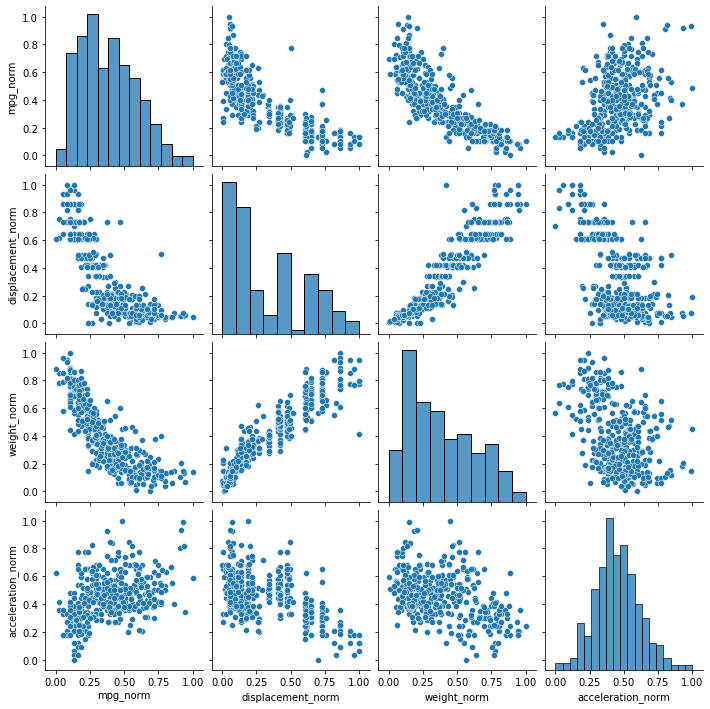

In [46]:
sns.pairplot(auto[num_cols_norm]);

Here's the same example, but using Z-normalization.

In [47]:
znorm_scaler = StandardScaler()
znorm_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(znorm_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()

,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,-0.706439,1.090604,0.630870,-1.295498
1,-1.090751,1.503514,0.854333,-1.477038
2,-0.706439,1.196232,0.550470,-1.658577
3,-0.962647,1.061796,0.546923,-1.295498
4,-0.834543,1.042591,0.565841,-1.840117


Let's look at the scatter plot matirx for the normalized features.

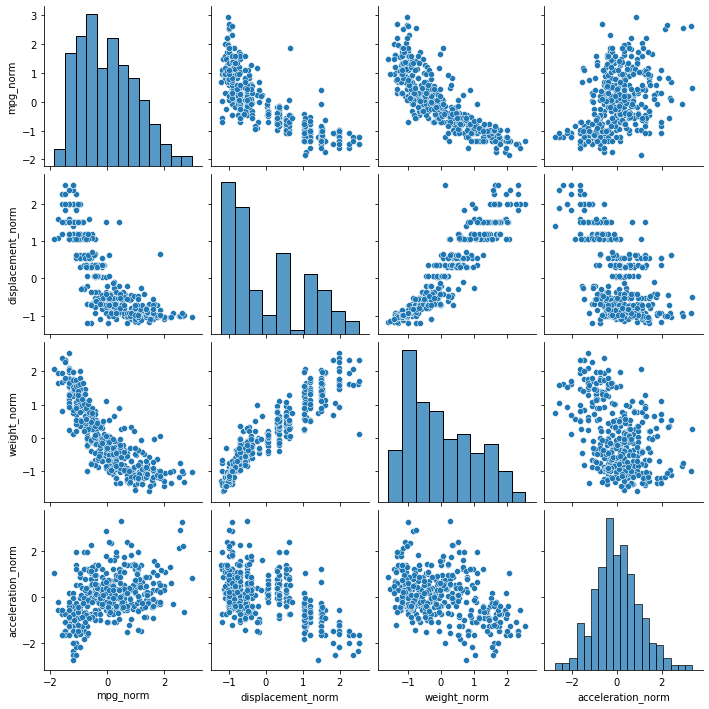

In [48]:
sns.pairplot(auto[num_cols_norm]);

In either case, it doesn't look like normalization changed anything to the scatter plot matrix. Do you notice what changed? The answer is that the **range of the data** is what changed. Just check the $x$ and $y$ axes and you'll see. Normalization is not really supposed to change the distribution of the data, just put all features on the same scale.

Let's look one last time at the code for normalizing the data using `sklearn`.

In [49]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(minmax_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()

,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,0.239362,0.617571,0.536150,0.238095
1,0.159574,0.728682,0.589736,0.208333
2,0.239362,0.645995,0.516870,0.178571
3,0.186170,0.609819,0.516019,0.238095
4,0.212766,0.604651,0.520556,0.148810


There's two things we need to point out about the code above:

In the third line, notice how we used `pd.DataFrame` to turn the data into a `DataFrame` object. This is because `sklearn` returns a `numpy` array instead of a `DataFrame`. As we saw earlier, the distinction is most of the time unimportant since a `DataFrame` is just a sort of wrapper for a `numpy` array, but if we want to use `DataFrame` methods like `head` to examine the results, we need to convert the data like we did.

You might be curious why we use `fit` followed by `transform`. What exactly happens when we run `fit`? Why should those two steps not be a single step? Here's a short answer using `MinMaxScaler` as our example:
  - When we run `fit` we find the min and max for the columns and rememeber it.
  - When we run `transform` we apply the transformation using the min and max we found when we ran `fit`.

This means that we can learn the min and max once, and then apply the **same** transformation (with the same min and max) not just to the original data, but any future data. In machine learning, this has important consequences, but that's the topic of a future lecture.

# Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in the previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

In [2]:
import pandas as pd

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


As we learned in the lab, some pre-processing steps are straight-forward, while others may require some work. Pre-process the data using the steps outlined below. Create a new data called `churn_processed` which stores only the pre-processed as you run through each of the these steps. You will need to make sure your columns are properly named.

1. Remove `age` and `store_id` from the data. <span style="color:red" float:right>[1 point]</span>

In [3]:
churn_processed = churn.copy() #creates a copy
del churn_processed['store_id'] #deletes store_id, there is no column age
churn_processed.head()

,user_id,gender,address,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,818467,11/1/2000 0:00,4.710000e+12,8,288


2. Convert `timestamp` into a `datetime` column and extract two new columns: `dow` is the day of the week and `month` is the month of the year. <span style="color:red" float:right>[2 point]</span>

In [4]:
churn_processed['timestamp']= pd.to_datetime(churn_processed['timestamp']) # changes timestamp from type object tp Datetime
churn_processed['month'] = pd.DatetimeIndex(churn_processed['timestamp']).month # isolates months
churn_processed['dow'] = pd.DatetimeIndex(churn_processed['timestamp']).weekday # isolates day of week
churn_processed.head()

,user_id,gender,address,trans_id,timestamp,item_id,quantity,dollar,month,dow
0,101981,F,E,818463,2000-11-01,4.710000e+12,1,37,11,2
1,101981,F,E,818464,2000-11-01,4.710000e+12,1,17,11,2
2,101981,F,E,818465,2000-11-01,4.710000e+12,1,23,11,2
3,101981,F,E,818466,2000-11-01,4.710000e+12,1,41,11,2
4,101981,F,E,818467,2000-11-01,4.710000e+12,8,288,11,2


3. One-hot encode `address`, `dow` and `month`. <span style="color:red" float:right>[1 point]</span>

In [5]:
#creates catagories for a given column
cat_cols = ['address','dow','month']
churn_processed[cat_cols] = churn_processed[cat_cols].astype('category')

# One Hot encodes 'Address', 'DOW','Month'
OH_churn = pd.get_dummies(churn_processed[['address', 'dow','month']], prefix = ['address', 'dow','month'])

OH_churn.head()

,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


4. Rescale `dollar` using min-max normalization. Use `pandas` to do it and call the rescaled column `dollar_std_minmax`. <span style="color:red" float:right>[1 point]</span>

In [14]:
# min_max formula (x-min)/(max-min)
churn_processed['dollar_std_minmax'] = (churn_processed['dollar'] - churn_processed['dollar'].min())/(churn_processed['dollar'].max() - churn_processed['dollar'].min())
churn_processed.head()

,user_id,gender,address,trans_id,timestamp,item_id,quantity,dollar,month,dow,dollar_std_minmax,qty_std_robust,qty_std_Z_byuser
0.0,101981,F,E,818463,2000-11-01 00:00:00,4.710000e+12,1,37,11,2,0.000036,0.0,-0.507100
1.0,101981,F,E,818464,2000-11-01 00:00:00,4.710000e+12,1,17,11,2,0.000016,0.0,-0.507100
2.0,101981,F,E,818465,2000-11-01 00:00:00,4.710000e+12,1,23,11,2,0.000022,0.0,-0.507100
3.0,101981,F,E,818466,2000-11-01 00:00:00,4.710000e+12,1,41,11,2,0.000040,0.0,-0.507100
4.0,101981,F,E,818467,2000-11-01 00:00:00,4.710000e+12,8,288,11,2,0.000287,7.0,6.951491


You can read about **robust normalization** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). The word **robust** in statistics generally refers to methods that are not affected by outliers. For example, you can say that the median is a *robust* measure for the "average" of the data, while the mean is not. 

5. Write briefly about what makes robust normalization different from Z-normalization then rescale `quantity` using robust normalization. Call the rescaled column `qty_std_robust`. <span style="color:red" float:right>[3 point]</span>

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

because Z-normalization uses the median it is easier to have outliers than the robust normalization which removes the median and scales.

In [7]:
from sklearn.preprocessing import RobustScaler
num_cols = ['quantity','dollar','month','dow']
scaler = RobustScaler()
scaler.fit(churn_processed[num_cols])
cp = pd.DataFrame(scaler.transform(churn_processed[num_cols]), columns = ['quantity','dollar','month','dow'])
churn_processed['qty_std_robust'] = cp['quantity']
churn_processed.head()

,user_id,gender,address,trans_id,timestamp,item_id,quantity,dollar,month,dow,dollar_std_minmax,qty_std_robust
0,101981,F,E,818463,2000-11-01,4.710000e+12,1,37,11,2,0.000510,0.0
1,101981,F,E,818464,2000-11-01,4.710000e+12,1,17,11,2,0.000227,0.0
2,101981,F,E,818465,2000-11-01,4.710000e+12,1,23,11,2,0.000312,0.0
3,101981,F,E,818466,2000-11-01,4.710000e+12,1,41,11,2,0.000567,0.0
4,101981,F,E,818467,2000-11-01,4.710000e+12,8,288,11,2,0.004066,7.0


6. Rescale `quantity` a second time, using Z-normalization, but normalize `quantity` **per user**, i.e. group by `user_id` so that the mean and standard deviation computed to normalize are computed separately by each `user_id`. Call the rescaled feature `qty_std_Z_byuser`. Briefly describe why and when you think this kind of normalization makes sense. <span style="color:red" float:right>[3 point]</span>

In [8]:
#z normalizaiton formula x-mean/std
Mean = churn_processed.groupby(['user_id']).quantity.transform('mean')    
Std = churn_processed.groupby(['user_id']).quantity.transform('std')
churn_processed['qty_std_Z_byuser'] = (churn_processed.quantity - Mean) / Std
churn_processed.head()

,user_id,gender,address,trans_id,timestamp,item_id,quantity,dollar,month,dow,dollar_std_minmax,qty_std_robust,qty_std_Z_byuser
0,101981,F,E,818463,2000-11-01,4.710000e+12,1,37,11,2,0.000510,0.0,-0.507100
1,101981,F,E,818464,2000-11-01,4.710000e+12,1,17,11,2,0.000227,0.0,-0.507100
2,101981,F,E,818465,2000-11-01,4.710000e+12,1,23,11,2,0.000312,0.0,-0.507100
3,101981,F,E,818466,2000-11-01,4.710000e+12,1,41,11,2,0.000567,0.0,-0.507100
4,101981,F,E,818467,2000-11-01,4.710000e+12,8,288,11,2,0.004066,7.0,6.951491


7. Convert `item_id` into a `category` column, then replace the `item_id` of all the items sold only once in the entire data with `999999`. <span style="color:red" float:right>[1 point]</span>

In [12]:
churn_processed['item_id'] = churn_processed['item_id'].astype('category') #creates catagories

for x in churn_processed['item_id'].unique(): #gets unique item_ids and sets them to 999999 
    churn_processed.item_id.loc[x] = 999999

8. Display the first few rows of your data. <span style="color:red" float:right>[1 point]</span>

In [13]:
churn_processed.head()

,user_id,gender,address,trans_id,timestamp,item_id,quantity,dollar,month,dow,dollar_std_minmax,qty_std_robust,qty_std_Z_byuser
0.0,101981,F,E,818463,2000-11-01 00:00:00,4.710000e+12,1,37,11,2,0.000510,0.0,-0.507100
1.0,101981,F,E,818464,2000-11-01 00:00:00,4.710000e+12,1,17,11,2,0.000227,0.0,-0.507100
2.0,101981,F,E,818465,2000-11-01 00:00:00,4.710000e+12,1,23,11,2,0.000312,0.0,-0.507100
3.0,101981,F,E,818466,2000-11-01 00:00:00,4.710000e+12,1,41,11,2,0.000567,0.0,-0.507100
4.0,101981,F,E,818467,2000-11-01 00:00:00,4.710000e+12,8,288,11,2,0.004066,7.0,6.951491


# End of assignment